# Import Modules & Util Functions

In [1]:
import os
import sys
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
from tqdm.notebook import tqdm
from pprint import pprint
from pytictoc import TicToc

from myutils import *
from profile import *

# Configure display options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)
%config InlineBackend.figure_format = 'retina'

# Set plot style
# plt.style.use('ggplot')

# Set Paramaters

In [2]:
# modeling
dirc_mets = 'dl_lost'
anchor_mode = 'by_event'
test_mode = False
# evaluate
iter_num = 5
save_answer = True
corr_lst = [None, 'adjust']
# corr_lst = ['max', 'zero', '25%', '50%', '75%']

# Dual Radio Evaluation

# Enter Model IDs

In [3]:
sr_model_name = '20240417_1333007d66_new_data_sync_v2'
dr_model_id = 'dr_20240417_1452001e84'

sr_model_id = sr_model_name[:19] if len(sr_model_name) > 19 else sr_model_name
sr_model_dscp = sr_model_name[20:] if len(sr_model_name) > 19 else None
dr_model_dscp = f'anchor_{anchor_mode}'
dr_model_name = f'{dr_model_id}_{dr_model_dscp}'

print('SR Model:', sr_model_id, sr_model_dscp)
print('DR Model:', dr_model_id, dr_model_dscp)

SR Model: 20240417_1333007d66 new_data_sync_v2
DR Model: dr_20240417_1452001e84 anchor_by_event


# BR: DR Eval

In [7]:
# Dual Radio Example
# dates = data_loader(query_dates=True, show_info=True)

# selected_dates = [s for s in dates if s >= '2023-09-12']
selected_dates = ['2024-03-19']
# excluded_dates = []
# selected_exps = []
# excluded_exps = ['Modem_Action_Test', 'Control_Group', 'Control_Group2', 'Control_Group3']
selected_routes = ['BR']
# excluded_routes = []
filepaths = data_loader(mode='dr', selected_dates=selected_dates, selected_routes=selected_routes)

print(len(filepaths))
# pprint(filepaths)

72


In [ ]:
for mode in corr_lst:
    model_corr = mode if mode == None or mode == 'adjust' else f'{mode}_corr'
    print('=======================', model_corr, '=======================')
    eval = DrEval(filepaths, 'BR', model_corr, sr_model_id, sr_model_dscp, dr_model_id, dr_model_dscp, dirc_mets=dirc_mets,
              anchor_mode=anchor_mode, test_mode=test_mode, save_answer=save_answer)
    eval.run_hist_method(N=iter_num)
    eval.plot()

# A: Dual Eval

In [110]:
# Dual Radio Example
# dates = data_loader(query_dates=True)

# selected_dates = [s for s in dates if s >= '2023-09-12']
selected_dates = ['2024-03-20']
# excluded_dates = []
# selected_exps = []
# excluded_exps = ['Modem_Action_Test', 'Control_Group', 'Control_Group2', 'Control_Group3']
selected_routes = ['A']
# excluded_routes = []
filepaths = data_loader(mode='dr', selected_dates=selected_dates, selected_routes=selected_routes)

print(len(filepaths))
# pprint(filepaths)

72


. 20240329_160006be6c_new_dataset_sync dr_20240408_0555003db4_anchor_by_packet A dl_lost
./20240329_160006be6c_new_dataset_sync/dl_lost/models/A
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/models/A
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/models/A_dr_prob_models.pkl
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_20240408_0345025_35035/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_20240408_0345025_35035.pkl
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/figures/A_20240408_0345025_35035.png


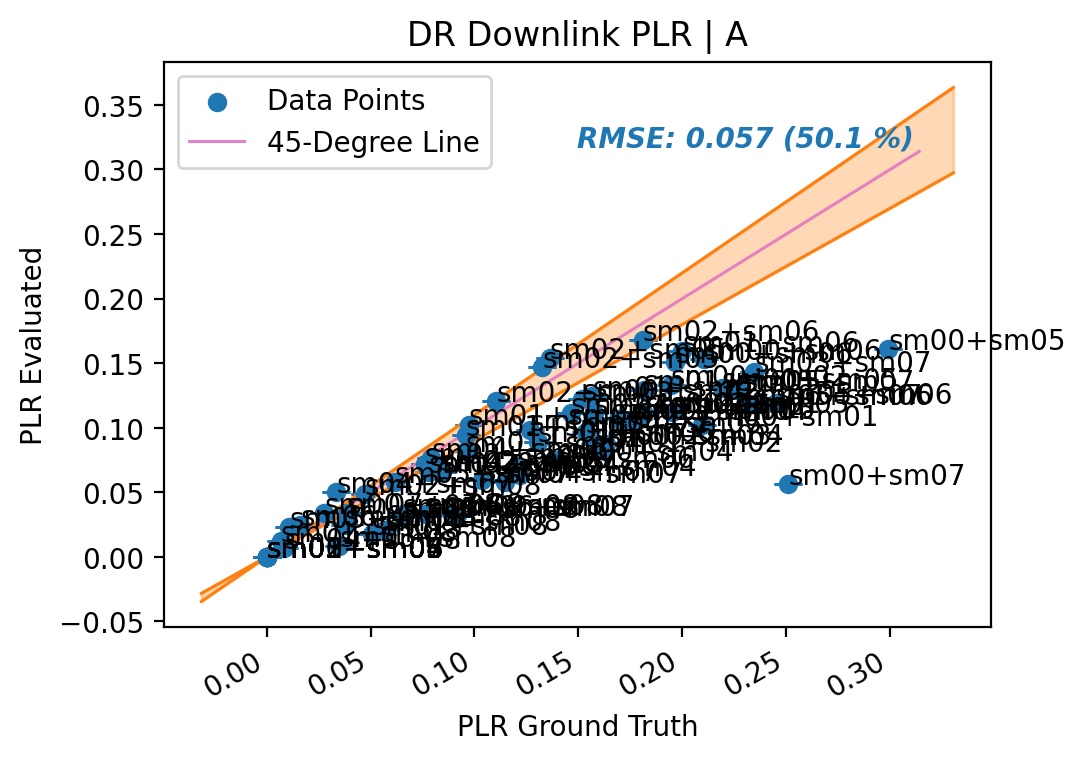

. 20240329_160006be6c_new_dataset_sync dr_20240408_0555003db4_anchor_by_packet A dl_lost
./20240329_160006be6c_new_dataset_sync/dl_lost/models/A
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/models/A
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/models/A_dr_prob_models_adjust.pkl
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
1/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
2/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
3/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
4/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
5/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
6/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
7/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/handover_info_log.csv
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#01/data/udp_dnlk_loss_latency.csv
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
8/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
9/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
10/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
11/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
12/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
13/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
14/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/handover_info_log.csv
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#01/data/udp_dnlk_loss_latency.csv
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
15/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
16/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
17/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
18/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
19/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
20/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/handover_info_log.csv
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#01/data/udp_dnlk_loss_latency.csv
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
21/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
22/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
23/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
24/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
25/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/handover_info_log.csv
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#01/data/udp_dnlk_loss_latency.csv
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
26/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
27/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
28/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
29/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/handover_info_log.csv
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#01/data/udp_dnlk_loss_latency.csv
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
30/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
31/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
32/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/handover_info_log.csv
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#01/data/udp_dnlk_loss_latency.csv
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
33/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
34/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/handover_info_log.csv
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#01/data/udp_dnlk_loss_latency.csv
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
35/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/handover_info_log.csv
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#01/data/udp_dnlk_loss_latency.csv
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/handover_info_log.csv
36/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#01/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#01\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#01\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
37/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
38/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
39/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
40/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
41/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
42/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
43/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/handover_info_log.csv
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm00/#02/data/udp_dnlk_loss_latency.csv
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
44/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm00\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
45/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
46/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
47/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
48/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
49/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
50/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/handover_info_log.csv
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm01/#02/data/udp_dnlk_loss_latency.csv
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
51/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm01\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
52/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
53/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
54/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
55/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
56/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/handover_info_log.csv
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm02/#02/data/udp_dnlk_loss_latency.csv
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
57/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm02\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
58/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
59/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
60/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
61/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/handover_info_log.csv
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm03/#02/data/udp_dnlk_loss_latency.csv
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
62/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm03\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
63/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
64/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
65/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/handover_info_log.csv
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm04/#02/data/udp_dnlk_loss_latency.csv
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
66/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm04\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
67/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
68/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/handover_info_log.csv
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm05/#02/data/udp_dnlk_loss_latency.csv
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
69/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm05\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
70/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/handover_info_log.csv
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm06/#02/data/udp_dnlk_loss_latency.csv
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
71/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm06\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/handover_info_log.csv
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm07/#02/data/udp_dnlk_loss_latency.csv
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/handover_info_log.csv
72/72 /home/wmnlab/F/database/2024-03-20/UDP_Bandlock_9S_Phone_A/sm08/#02/data/udp_dnlk_loss_latency.csv


  0%|                                                                                                         …

/home/wmnlab/F/results/20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/A_adjust_20240408_0345026_917c7/\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm07\#02\data\udp_dnlk_loss_latency\home\wmnlab\F\database\2024-03-20\UDP_Bandlock_9S_Phone_A\sm08\#02\data\udp_dnlk_loss_latency.csv
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/results/A_adjust_20240408_0345026_917c7.pkl
./20240329_160006be6c_new_dataset_sync/dr_20240408_0555003db4_anchor_by_packet/dl_lost/figures/A_adjust_20240408_0345026_917c7.png


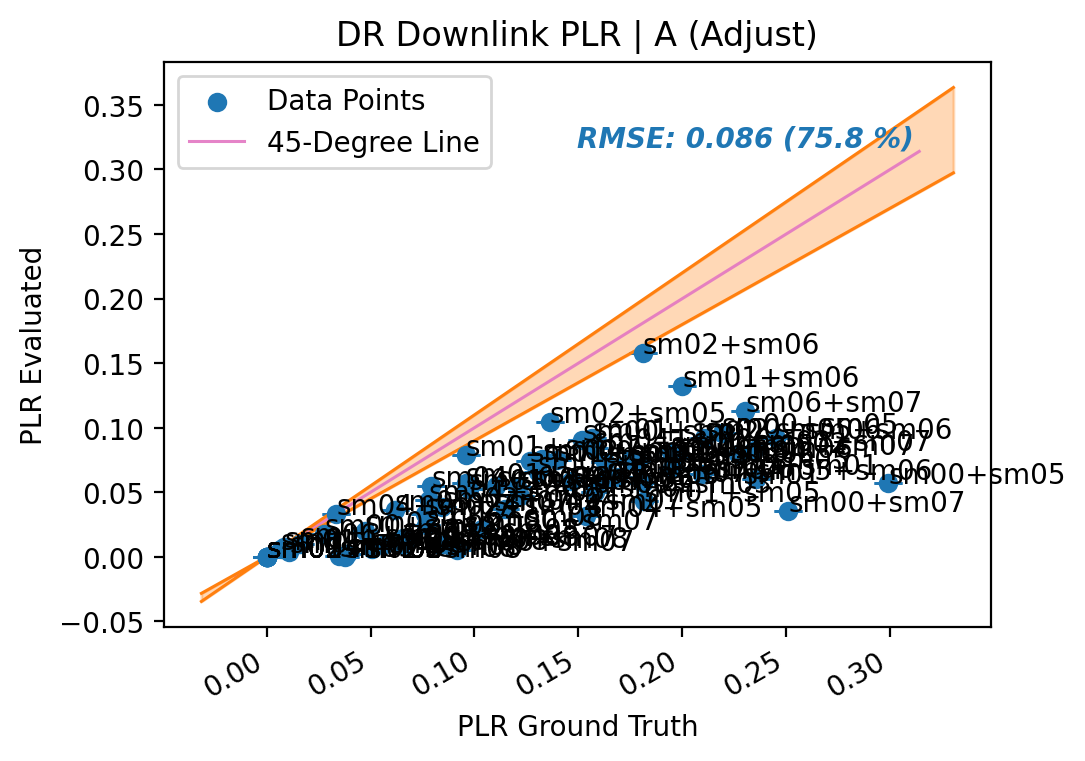

In [111]:
for mode in corr_lst:
    model_corr = mode if mode == None or mode == 'adjust' else f'{mode}_corr'
    print('=======================', model_corr, '=======================')
    eval = DrEval(filepaths, 'A', model_corr, sr_model_id, sr_model_dscp, dr_model_id, dr_model_dscp, dirc_mets=dirc_mets,
              anchor_mode=anchor_mode, test_mode=test_mode, save_answer=save_answer)
    eval.run_hist_method(N=iter_num)
    eval.plot()